<a href="https://colab.research.google.com/github/abhiyantaabhishek/tutorial/blob/master/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visit [here](https://abhiyantaabhishek.github.io/Simplest_Regression.html) for more detailed explaination.

# Simplest Linear Regression Example

Simplest linear regression example for understanding the concept 


In [23]:
from __future__ import absolute_import, division, print_function

Import the library

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

Initilise the paramaters

In [50]:
learning_rate = 0.001
training_steps = 500
display_step = 25

num_classes = 10 # 0 to 9 digits
num_row= num_col = 4
num_features = num_row * num_col

# Training parameters.
learning_rate = 0.01
training_steps = 1000
batch_size = 256
display_step = 50

Generate trainning data, Here X contains value from 1 to and so as Y
The model must learn to 

In [28]:
X = [i for i in range(1,20)]
Y=[2*i for i in range(1,20)]


In [51]:
x_train = []
y_train = []
x_test = []
y_test = []
for _ in range(500):
  x_train.append(rng.randint(low = 10,high=21, size=(num_row , num_col)))
  y_train.append(0)
  x_train.append(rng.randint(low = 30,high=41, size=(num_row , num_col)))
  y_train.append(1)
  x_train.append(rng.randint(low = 50,high=61, size=(num_row , num_col)))
  y_train.append(2)
x_train = np.array(x_train)
y_train = np.array(y_train)

for _ in range(100):
  x_test.append(rng.randint(low = 10,high=21, size=(num_row , num_col)))
  y_test.append(0)
  x_test.append(rng.randint(low = 30,high=41, size=(num_row , num_col)))
  y_test.append(1)
  x_test.append(rng.randint(low = 50,high=61, size=(num_row , num_col)))
  y_test.append(2)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [52]:
x_train.shape

(1500, 4, 4)

In [53]:
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

In [54]:
x_train.shape

(1500, 16)

In [55]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [58]:
train_data

<PrefetchDataset shapes: ((None, 16), (None,)), types: (tf.int64, tf.int64)>

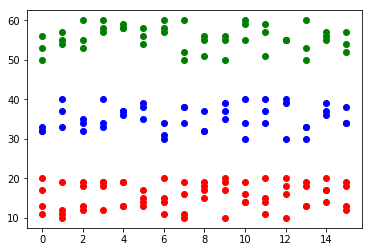

In [64]:
for i in range(0,10):
  if(y_train[i] == 0):
    plt.plot(x_train[i],'ro', label='Original data')
  if(y_train[i] == 1):
    plt.plot(x_train[i],'bo', label='Original data')    
  if(y_train[i] == 2):
    plt.plot(x_train[i],'go', label='Original data')    

In [65]:

def linear_regression(x):
    return W * x + b
# Logistic regression (Wx + b).
def logistic_regression(x):
    # Apply softmax to normalize the logits to a probability distribution.
    return tf.nn.softmax(tf.matmul(x, W) + b)


def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred),1))

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

optimizer = tf.optimizers.Adam(learning_rate)

In [72]:

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(X)
        loss = cross_entropy(pred, Y)
    gradients = g.gradient(loss, [W, b])

    optimizer.apply_gradients(zip(gradients, [W, b]))

In [77]:
W.shape

TensorShape([16, 10])

In [ ]:
W

In [78]:
batch_x.shape

TensorShape([256, 16])

In [ ]:
batch_x

In [79]:
tf.matmul(batch_x, W)

InvalidArgumentError: ignored

In [67]:
W = tf.Variable(rng.randn(num_features,num_classes), name="weight")
b = tf.Variable(rng.randn(num_classes), name="bias")

In [ ]:

for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

In [76]:
batch_x.shape

TensorShape([256, 16])

In [ ]:
print(W.numpy())
print(b.numpy())

2.0000012
-1.6678565e-05


In [ ]:
predict = linear_regression([90])
print(np.round(predict.numpy()))

[180.]


2.0000012


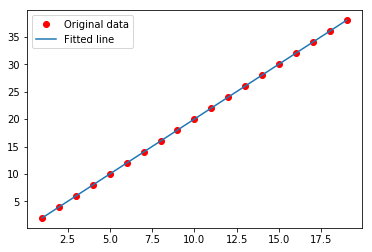

In [ ]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

Try adding noise

In [ ]:
X = [i+rng.randn() for i in range(1,20)]
Y=[i for i in range(1,20)]


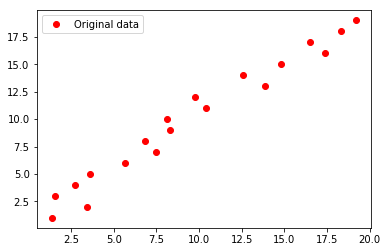

In [ ]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.legend()
plt.show()

In [ ]:
learning_rate = 0.001
training_steps = 500
display_step = 25

In [ ]:
# Randomise the weight and bais
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [ ]:
for step in range(1, training_steps + 1):
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 25, loss: 1.229629, W: 0.951268, b: 1.386810
step: 50, loss: 1.003432, W: 0.954647, b: 0.978414
step: 75, loss: 0.988221, W: 0.949612, b: 0.937971
step: 100, loss: 0.986721, W: 0.944254, b: 0.976543
step: 125, loss: 0.986545, W: 0.944681, b: 0.961467
step: 150, loss: 0.986526, W: 0.944185, b: 0.964376
step: 175, loss: 0.986525, W: 0.944131, b: 0.963976
step: 200, loss: 0.986525, W: 0.944118, b: 0.963875
step: 225, loss: 0.986525, W: 0.944111, b: 0.963932
step: 250, loss: 0.986525, W: 0.944114, b: 0.963912
step: 275, loss: 0.986525, W: 0.944114, b: 0.963918
step: 300, loss: 0.986525, W: 0.944114, b: 0.963917
step: 325, loss: 0.986525, W: 0.944114, b: 0.963917
step: 350, loss: 0.986525, W: 0.944114, b: 0.963917
step: 375, loss: 0.986525, W: 0.944114, b: 0.963917
step: 400, loss: 0.986525, W: 0.944114, b: 0.963917
step: 425, loss: 0.986525, W: 0.944114, b: 0.963917
step: 450, loss: 0.986525, W: 0.944114, b: 0.963917
step: 475, loss: 0.986525, W: 0.944114, b: 0.963917
step: 500, loss

In [ ]:
print(W.numpy())
print(b.numpy())

0.94411397
0.9639169


In [ ]:
predict = linear_regression([90])
print(np.round(predict.numpy()))

[86.]


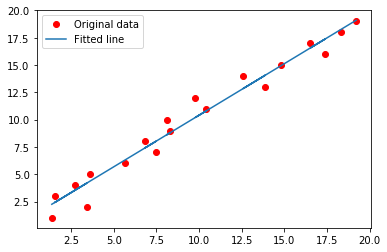

In [ ]:

plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()